In [2]:
import pandas as pd
import numpy as np

In [6]:
ad1 = pd.read_csv(r"F:\computing-usage-dataset\computing-usage-dataset\ec2_cpu_utilization_5f5533.csv")

In [9]:
ad1.head(10)

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714
5,2014-02-14 14:52:00,44.986
6,2014-02-14 14:57:00,49.108
7,2014-02-14 15:02:00,40.470
8,2014-02-14 15:07:00,53.404
9,2014-02-14 15:12:00,45.400


In [11]:
ad1['timestamp'] = pd.to_datetime(ad1['timestamp'])

In [12]:
ad1['timestamp'] = pd.to_datetime(ad1['timestamp'], errors='coerce')

In [19]:
print(ad1.isnull().sum())

timestamp     0
value         0
is_anomaly    0
dtype: int64


In [20]:
ad1.set_index('timestamp', inplace=True)

In [35]:
ad1.head(10)

,value,is_anomaly,predicted_anomaly
timestamp,,,
2014-02-14 14:27:00,51.846,1,0
2014-02-14 14:32:00,44.508,1,0
2014-02-14 14:37:00,41.244,1,0
2014-02-14 14:42:00,48.568,1,0
2014-02-14 14:47:00,46.714,1,0
2014-02-14 14:52:00,44.986,1,0
2014-02-14 14:57:00,49.108,1,0
2014-02-14 15:02:00,40.470,1,0
2014-02-14 15:07:00,53.404,1,1


In [23]:
print(ad1.columns)


Index(['value', 'is_anomaly'], dtype='object')


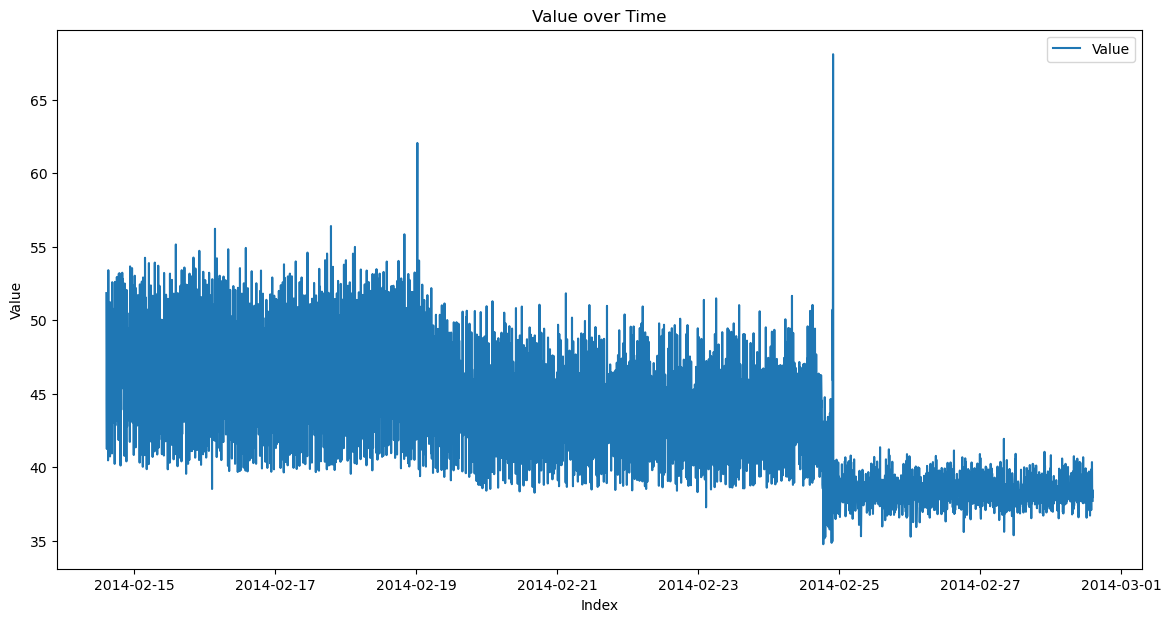

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the 'value' column
plt.figure(figsize=(14, 7))
plt.plot(ad1['value'], label='Value')
plt.title('Value over Time')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


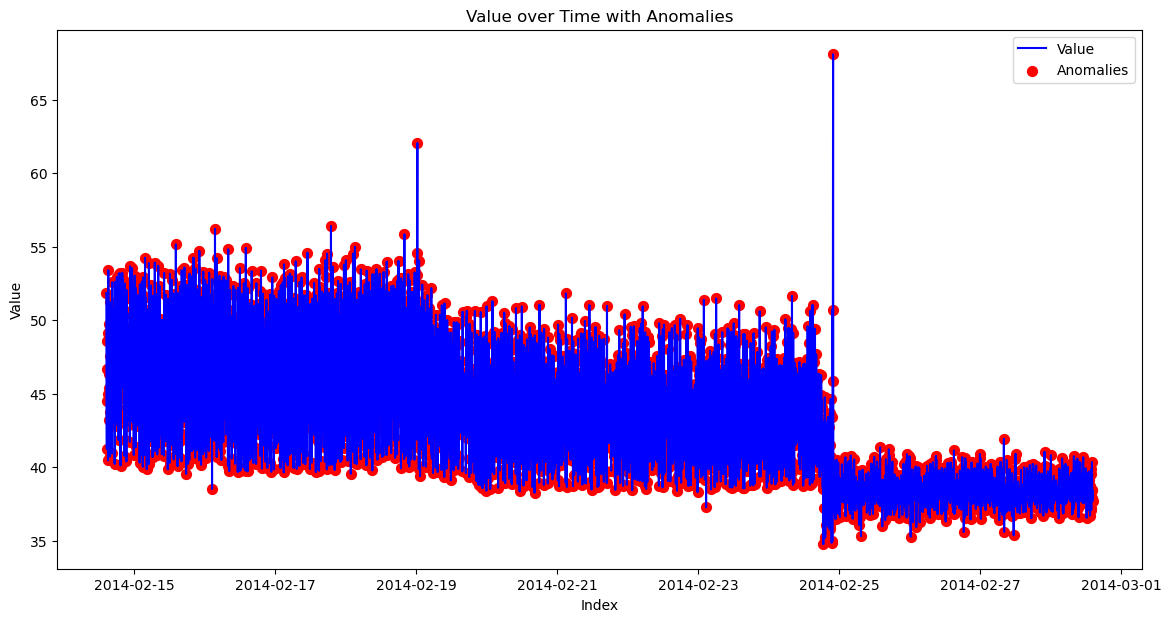

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the 'value' column
plt.figure(figsize=(14, 7))
plt.plot(ad1['value'], label='Value', color='blue')

# Highlight anomalies by filtering the DataFrame
anomalies = ad1[ad1['is_anomaly'] == 1]

# Scatter plot for anomalies
plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomalies', s=50)

# Add labels and title
plt.title('Value over Time with Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
ad1_train , ad1_test = train_test_split(ad1 , test_size=.2)

In [39]:
ad1_train_x = ad1_train.iloc[: , 0 : -1]
ad1_train_y  = ad1_train.iloc[: , -1]

In [40]:
ad1_test_x = ad1_test.iloc[: , 0 : -1]
ad1_test_y  = ad1_test.iloc[: , -1]

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_ad1 = KNeighborsClassifier(n_neighbors=5)

In [42]:
knn_ad1.fit(ad1_train_x , ad1_train_y)

KNeighborsClassifier()

In [45]:
pred_knn_ad1 = knn_ad1.predict(ad1_test_x)

In [47]:
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
confusion_matrix(ad1_test_y , pred_knn_ad1)

array([[771,   2],
       [  1,  33]], dtype=int64)

In [49]:
print(classification_report(ad1_test_y,pred_knn_ad1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       0.94      0.97      0.96        34

    accuracy                           1.00       807
   macro avg       0.97      0.98      0.98       807
weighted avg       1.00      1.00      1.00       807



In [ ]:
******************************************************************************************************************

In [106]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"F:\computing-usage-dataset\computing-usage-dataset\ec2_cpu_utilization_24ae8d.csv")  # Replace with your file

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract features from datetime
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Drop original timestamp column
df.drop('timestamp', axis=1, inplace=True)


In [107]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('value', axis=1)
y = df['value']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [108]:
from sklearn.ensemble import IsolationForest

# Initialize the model
model = IsolationForest(contamination=0.05)  # Adjust contamination parameter

# Fit the model
model.fit(X_scaled)

# Predict anomalies
df['anomaly'] = model.predict(X_scaled)  # -1 for anomaly, 1 for normal


In [109]:
from sklearn.svm import OneClassSVM

# Initialize the model
model = OneClassSVM(gamma='auto', nu=0.05)  # Adjust nu parameter

# Fit the model
model.fit(X_scaled)

# Predict anomalies
df['anomaly'] = model.predict(X_scaled)  # -1 for anomaly, 1 for normal


In [110]:
# View the results
print(df.head())


   value  year  month  day  hour  minute  anomaly
0  0.132  2014      2   14    14      30        1
1  0.134  2014      2   14    14      35        1
2  0.134  2014      2   14    14      40        1
3  0.134  2014      2   14    14      45        1
4  0.134  2014      2   14    14      50        1


In [112]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df, test_size=.2)

In [113]:
df_train_x = df_train.iloc[: , 0 : -1]
df_train_y = df_train.iloc[: , -1]

In [114]:
df_test_x = df_test.iloc[: , 0 : -1]
df_test_y = df_test.iloc[: , -1]

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn_df = KNeighborsClassifier(n_neighbors=5)

In [116]:
knn_df.fit(df_train_x , df_train_y)

KNeighborsClassifier()

In [119]:
pred_knn_df = knn_df.predict(df_test_x)

In [120]:
confusion_matrix(df_test_y , pred_knn_df)

array([[ 20,  23],
       [  2, 762]], dtype=int64)

In [121]:
print(classification_report(df_test_y , pred_knn_df))

              precision    recall  f1-score   support

          -1       0.91      0.47      0.62        43
           1       0.97      1.00      0.98       764

    accuracy                           0.97       807
   macro avg       0.94      0.73      0.80       807
weighted avg       0.97      0.97      0.96       807



In [ ]:
**************************************************************************************************************

In [123]:
cp = pd.read_csv(r"F:\computing-usage-dataset\computing-usage-dataset\ec2_cpu_utilization_53ea38.csv")
cp.head()

,timestamp,value
0,2014-02-14 14:30:00,1.732
1,2014-02-14 14:35:00,1.732
2,2014-02-14 14:40:00,1.960
3,2014-02-14 14:45:00,1.732
4,2014-02-14 14:50:00,1.706


In [129]:
cp['year'] = cp['timestamp'].dt.year
cp['month'] = cp['timestamp'].dt.month
cp['day'] = cp['timestamp'].dt.day
cp['hour'] = cp['timestamp'].dt.hour
cp['minute'] = cp['timestamp'].dt.minute

# Drop original timestamp column
cp.drop('timestamp', axis=1, inplace=True)

In [130]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = cp.drop('value', axis=1)
y = cp['value']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
from sklearn.ensemble import IsolationForest

# Initialize the model
model = IsolationForest(contamination=0.05)  # Adjust contamination parameter

# Fit the model
model.fit(X_scaled)

# Predict anomalies
cp['anomaly'] = model.predict(X_scaled)  # -1 for anomaly, 1 for normal


In [132]:
from sklearn.svm import OneClassSVM

# Initialize the model
model = OneClassSVM(gamma='auto', nu=0.05)  # Adjust nu parameter

# Fit the model
model.fit(X_scaled)

# Predict anomalies
cp['anomaly'] = model.predict(X_scaled)  # -1 for anomaly, 1 for normal


In [133]:
print(df.head())

   value  year  month  day  hour  minute  anomaly
0  0.132  2014      2   14    14      30        1
1  0.134  2014      2   14    14      35        1
2  0.134  2014      2   14    14      40        1
3  0.134  2014      2   14    14      45        1
4  0.134  2014      2   14    14      50        1


In [135]:
from sklearn.model_selection import train_test_split
cp_train , cp_test = train_test_split(cp, test_size=.2)

In [136]:
cp_train_x = cp_train.iloc[: , 0 : -1]
cp_train_y = cp_train.iloc[: , -1]

In [137]:
cp_test_x = cp_test.iloc[: , 0 : -1]
cp_test_y = cp_test.iloc[: , -1]

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn_cp = KNeighborsClassifier(n_neighbors=5)

In [139]:
knn_cp.fit(cp_train_x , cp_train_y)

KNeighborsClassifier()

In [140]:
pred_knn_cp = knn_cp.predict(cp_test_x)

In [141]:
confusion_matrix(cp_test_y , pred_knn_cp)

array([[ 16,  22],
       [  3, 766]], dtype=int64)

In [142]:
print(classification_report(cp_test_y , pred_knn_cp))

              precision    recall  f1-score   support

          -1       0.84      0.42      0.56        38
           1       0.97      1.00      0.98       769

    accuracy                           0.97       807
   macro avg       0.91      0.71      0.77       807
weighted avg       0.97      0.97      0.96       807



In [143]:
from sklearn.ensemble import RandomForestClassifier
rf_cp = RandomForestClassifier()

In [144]:
rf_cp.fit(cp_train_x , cp_train_y)

RandomForestClassifier()

In [145]:
predict_rf_cp = rf_cp.predict(cp_test_x)

In [146]:
confusion_matrix(cp_test_y , predict_rf_cp)

array([[ 20,  18],
       [  4, 765]], dtype=int64)

In [147]:
print(classification_report(cp_test_y , predict_rf_cp))

              precision    recall  f1-score   support

          -1       0.83      0.53      0.65        38
           1       0.98      0.99      0.99       769

    accuracy                           0.97       807
   macro avg       0.91      0.76      0.82       807
weighted avg       0.97      0.97      0.97       807

